<a href="https://colab.research.google.com/github/nutzbee/Documentations/blob/main/Using_K_means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **LIBRARIES AND DATASET**

In [1]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from google.colab import files
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [2]:
uploaded = files.upload()

Saving ABBREV.xlsx to ABBREV.xlsx


In [3]:
import io
df1=pd.read_excel(io.BytesIO(uploaded['ABBREV.xlsx']))

In [4]:
original=pd.read_excel(uploaded['ABBREV.xlsx'])

# **DATA PREPROCESSING**

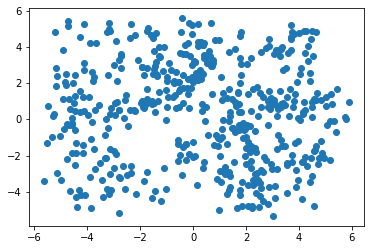

In [5]:
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline
X, y = datasets.make_blobs(n_samples=500, centers=100, cluster_std=0.5, center_box=(-5,5))
plt.scatter(X[:,0], X[:,1])

In [6]:
df1.dtypes

NDB_No                 int64
Shrt_Desc             object
Water_(g)            float64
Energ_Kcal             int64
Protein_(g)          float64
Lipid_Tot_(g)        float64
Ash_(g)              float64
Carbohydrt_(g)       float64
Fiber_TD_(g)         float64
Sugar_Tot_(g)        float64
Calcium_(mg)         float64
Iron_(mg)            float64
Magnesium_(mg)       float64
Phosphorus_(mg)      float64
Potassium_(mg)       float64
Sodium_(mg)          float64
Zinc_(mg)            float64
Copper_mg)           float64
Manganese_(mg)       float64
Selenium_(µg)        float64
Vit_C_(mg)           float64
Thiamin_(mg)         float64
Riboflavin_(mg)      float64
Niacin_(mg)          float64
Panto_Acid_mg)       float64
Vit_B6_(mg)          float64
Folate_Tot_(µg)      float64
Folic_Acid_(µg)      float64
Food_Folate_(µg)     float64
Folate_DFE_(µg)      float64
Choline_Tot_ (mg)    float64
Vit_B12_(µg)         float64
Vit_A_IU             float64
Vit_A_RAE            float64
Retinol_(µg)  

In [7]:
df1.head()

,NDB_No,Shrt_Desc,Water_(g),Energ_Kcal,Protein_(g),Lipid_Tot_(g),Ash_(g),Carbohydrt_(g),Fiber_TD_(g),Sugar_Tot_(g),...,Vit_K_(µg),FA_Sat_(g),FA_Mono_(g),FA_Poly_(g),Cholestrl_(mg),GmWt_1,GmWt_Desc1,GmWt_2,GmWt_Desc2,Refuse_Pct
0,1001,"BUTTER,WITH SALT",15.87,717,0.85,81.11,2.11,0.06,0.0,0.06,...,7.0,51.368,21.021,3.043,215.0,5.00,"1 pat, (1"" sq, 1/3"" high)",14.2,1 tbsp,0.0
1,1002,"BUTTER,WHIPPED,W/ SALT",16.72,718,0.49,78.30,1.62,2.87,0.0,0.06,...,4.6,45.390,19.874,3.331,225.0,3.80,"1 pat, (1"" sq, 1/3"" high)",9.4,1 tbsp,0.0
2,1003,"BUTTER OIL,ANHYDROUS",0.24,876,0.28,99.48,0.00,0.00,0.0,0.00,...,8.6,61.924,28.732,3.694,256.0,12.80,1 tbsp,205.0,1 cup,0.0
3,1004,"CHEESE,BLUE",42.41,353,21.40,28.74,5.11,2.34,0.0,0.50,...,2.4,18.669,7.778,0.800,75.0,28.35,1 oz,17.0,1 cubic inch,0.0
4,1005,"CHEESE,BRICK",41.11,371,23.24,29.68,3.18,2.79,0.0,0.51,...,2.5,18.764,8.598,0.784,94.0,132.00,"1 cup, diced",113.0,"1 cup, shredded",0.0


In [8]:
df1.columns

Index(['NDB_No', 'Shrt_Desc', 'Water_(g)', 'Energ_Kcal', 'Protein_(g)',
       'Lipid_Tot_(g)', 'Ash_(g)', 'Carbohydrt_(g)', 'Fiber_TD_(g)',
       'Sugar_Tot_(g)', 'Calcium_(mg)', 'Iron_(mg)', 'Magnesium_(mg)',
       'Phosphorus_(mg)', 'Potassium_(mg)', 'Sodium_(mg)', 'Zinc_(mg)',
       'Copper_mg)', 'Manganese_(mg)', 'Selenium_(µg)', 'Vit_C_(mg)',
       'Thiamin_(mg)', 'Riboflavin_(mg)', 'Niacin_(mg)', 'Panto_Acid_mg)',
       'Vit_B6_(mg)', 'Folate_Tot_(µg)', 'Folic_Acid_(µg)', 'Food_Folate_(µg)',
       'Folate_DFE_(µg)', 'Choline_Tot_ (mg)', 'Vit_B12_(µg)', 'Vit_A_IU',
       'Vit_A_RAE', 'Retinol_(µg)', 'Alpha_Carot_(µg)', 'Beta_Carot_(µg)',
       'Beta_Crypt_(µg)', 'Lycopene_(µg)', 'Lut+Zea_ (µg)', 'Vit_E_(mg)',
       'Vit_D_µg', 'Vit_D_IU', 'Vit_K_(µg)', 'FA_Sat_(g)', 'FA_Mono_(g)',
       'FA_Poly_(g)', 'Cholestrl_(mg)', 'GmWt_1', 'GmWt_Desc1', 'GmWt_2',
       'GmWt_Desc2', 'Refuse_Pct'],
      dtype='object')

In [9]:
from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()
df1['GmWt_Desc2'] = le.fit_transform(df1['GmWt_Desc2'])
df1['GmWt_Desc1'] = le.fit_transform(df1['GmWt_Desc1'])

In [10]:
df1.head()

,NDB_No,Shrt_Desc,Water_(g),Energ_Kcal,Protein_(g),Lipid_Tot_(g),Ash_(g),Carbohydrt_(g),Fiber_TD_(g),Sugar_Tot_(g),...,Vit_K_(µg),FA_Sat_(g),FA_Mono_(g),FA_Poly_(g),Cholestrl_(mg),GmWt_1,GmWt_Desc1,GmWt_2,GmWt_Desc2,Refuse_Pct
0,1001,"BUTTER,WITH SALT",15.87,717,0.85,81.11,2.11,0.06,0.0,0.06,...,7.0,51.368,21.021,3.043,215.0,5.00,411,14.2,783,0.0
1,1002,"BUTTER,WHIPPED,W/ SALT",16.72,718,0.49,78.30,1.62,2.87,0.0,0.06,...,4.6,45.390,19.874,3.331,225.0,3.80,411,9.4,783,0.0
2,1003,"BUTTER OIL,ANHYDROUS",0.24,876,0.28,99.48,0.00,0.00,0.0,0.00,...,8.6,61.924,28.732,3.694,256.0,12.80,670,205.0,227,0.0
3,1004,"CHEESE,BLUE",42.41,353,21.40,28.74,5.11,2.34,0.0,0.50,...,2.4,18.669,7.778,0.800,75.0,28.35,368,17.0,224,0.0
4,1005,"CHEESE,BRICK",41.11,371,23.24,29.68,3.18,2.79,0.0,0.51,...,2.5,18.764,8.598,0.784,94.0,132.00,219,113.0,273,0.0


In [11]:
df1.dtypes

NDB_No                 int64
Shrt_Desc             object
Water_(g)            float64
Energ_Kcal             int64
Protein_(g)          float64
Lipid_Tot_(g)        float64
Ash_(g)              float64
Carbohydrt_(g)       float64
Fiber_TD_(g)         float64
Sugar_Tot_(g)        float64
Calcium_(mg)         float64
Iron_(mg)            float64
Magnesium_(mg)       float64
Phosphorus_(mg)      float64
Potassium_(mg)       float64
Sodium_(mg)          float64
Zinc_(mg)            float64
Copper_mg)           float64
Manganese_(mg)       float64
Selenium_(µg)        float64
Vit_C_(mg)           float64
Thiamin_(mg)         float64
Riboflavin_(mg)      float64
Niacin_(mg)          float64
Panto_Acid_mg)       float64
Vit_B6_(mg)          float64
Folate_Tot_(µg)      float64
Folic_Acid_(µg)      float64
Food_Folate_(µg)     float64
Folate_DFE_(µg)      float64
Choline_Tot_ (mg)    float64
Vit_B12_(µg)         float64
Vit_A_IU             float64
Vit_A_RAE            float64
Retinol_(µg)  

In [12]:
df1.shape

(8790, 53)

In [13]:
df1.columns

Index(['NDB_No', 'Shrt_Desc', 'Water_(g)', 'Energ_Kcal', 'Protein_(g)',
       'Lipid_Tot_(g)', 'Ash_(g)', 'Carbohydrt_(g)', 'Fiber_TD_(g)',
       'Sugar_Tot_(g)', 'Calcium_(mg)', 'Iron_(mg)', 'Magnesium_(mg)',
       'Phosphorus_(mg)', 'Potassium_(mg)', 'Sodium_(mg)', 'Zinc_(mg)',
       'Copper_mg)', 'Manganese_(mg)', 'Selenium_(µg)', 'Vit_C_(mg)',
       'Thiamin_(mg)', 'Riboflavin_(mg)', 'Niacin_(mg)', 'Panto_Acid_mg)',
       'Vit_B6_(mg)', 'Folate_Tot_(µg)', 'Folic_Acid_(µg)', 'Food_Folate_(µg)',
       'Folate_DFE_(µg)', 'Choline_Tot_ (mg)', 'Vit_B12_(µg)', 'Vit_A_IU',
       'Vit_A_RAE', 'Retinol_(µg)', 'Alpha_Carot_(µg)', 'Beta_Carot_(µg)',
       'Beta_Crypt_(µg)', 'Lycopene_(µg)', 'Lut+Zea_ (µg)', 'Vit_E_(mg)',
       'Vit_D_µg', 'Vit_D_IU', 'Vit_K_(µg)', 'FA_Sat_(g)', 'FA_Mono_(g)',
       'FA_Poly_(g)', 'Cholestrl_(mg)', 'GmWt_1', 'GmWt_Desc1', 'GmWt_2',
       'GmWt_Desc2', 'Refuse_Pct'],
      dtype='object')

In [14]:
features = ['NDB_No','Shrt_Desc', 'Water_(g)', 'Energ_Kcal', 'Protein_(g)', 'Lipid_Tot_(g)',
       'Ash_(g)', 'Carbohydrt_(g)', 'Fiber_TD_(g)', 'Sugar_Tot_(g)',
       'Calcium_(mg)', 'Iron_(mg)', 'Magnesium_(mg)', 'Phosphorus_(mg)',
       'Potassium_(mg)', 'Sodium_(mg)', 'Zinc_(mg)', 'Copper_mg)',
       'Manganese_(mg)', 'Selenium_(µg)', 'Vit_C_(mg)', 'Thiamin_(mg)',
       'Riboflavin_(mg)', 'Niacin_(mg)', 'Panto_Acid_mg)', 'Vit_B6_(mg)',
       'Folate_Tot_(µg)', 'Folic_Acid_(µg)', 'Food_Folate_(µg)',
       'Folate_DFE_(µg)', 'Choline_Tot_ (mg)', 'Vit_B12_(µg)', 'Vit_A_IU',
       'Vit_A_RAE', 'Retinol_(µg)', 'Alpha_Carot_(µg)', 'Beta_Carot_(µg)',
       'Beta_Crypt_(µg)', 'Lycopene_(µg)', 'Lut+Zea_ (µg)', 'Vit_E_(mg)',
       'Vit_D_µg', 'Vit_D_IU', 'Vit_K_(µg)', 'FA_Sat_(g)', 'FA_Mono_(g)',
       'FA_Poly_(g)', 'Cholestrl_(mg)', 'GmWt_1', 'GmWt_Desc1', 'GmWt_2',
       'GmWt_Desc2', 'Refuse_Pct']

In [15]:
df_fnutrients = df1[features]

In [16]:
df_fnutrients

,NDB_No,Shrt_Desc,Water_(g),Energ_Kcal,Protein_(g),Lipid_Tot_(g),Ash_(g),Carbohydrt_(g),Fiber_TD_(g),Sugar_Tot_(g),...,Vit_K_(µg),FA_Sat_(g),FA_Mono_(g),FA_Poly_(g),Cholestrl_(mg),GmWt_1,GmWt_Desc1,GmWt_2,GmWt_Desc2,Refuse_Pct
0,1001,"BUTTER,WITH SALT",15.87,717,0.85,81.11,2.11,0.06,0.0,0.06,...,7.0,51.368,21.021,3.043,215.0,5.00,411,14.2,783,0.0
1,1002,"BUTTER,WHIPPED,W/ SALT",16.72,718,0.49,78.30,1.62,2.87,0.0,0.06,...,4.6,45.390,19.874,3.331,225.0,3.80,411,9.4,783,0.0
2,1003,"BUTTER OIL,ANHYDROUS",0.24,876,0.28,99.48,0.00,0.00,0.0,0.00,...,8.6,61.924,28.732,3.694,256.0,12.80,670,205.0,227,0.0
3,1004,"CHEESE,BLUE",42.41,353,21.40,28.74,5.11,2.34,0.0,0.50,...,2.4,18.669,7.778,0.800,75.0,28.35,368,17.0,224,0.0
4,1005,"CHEESE,BRICK",41.11,371,23.24,29.68,3.18,2.79,0.0,0.51,...,2.5,18.764,8.598,0.784,94.0,132.00,219,113.0,273,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8785,83110,"MACKEREL,SALTED",43.00,305,18.50,25.10,13.40,0.00,0.0,0.00,...,7.8,7.148,8.320,6.210,95.0,80.00,442,17.0,225,0.0
8786,90240,"SCALLOP,(BAY&SEA),CKD,STMD",70.25,111,20.54,0.84,2.97,5.41,0.0,0.00,...,0.0,0.218,0.082,0.222,41.0,85.00,826,NaN,921,0.0
8787,90480,"SYRUP,CANE",26.00,269,0.00,0.00,0.86,73.14,0.0,73.20,...,0.0,0.000,0.000,0.000,0.0,21.00,481,NaN,921,0.0
8788,90560,"SNAIL,RAW",79.20,90,16.10,1.40,1.30,2.00,0.0,0.00,...,0.1,0.361,0.259,0.252,50.0,85.00,826,NaN,921,0.0


In [17]:
df_fnutrients.to_csv("feature_transformed_values.csv",index=False)

In [18]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from itertools import cycle, islice
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates
%matplotlib inline

In [19]:
df_fnutrients.isnull().sum()

NDB_No                  0
Shrt_Desc               0
Water_(g)               1
Energ_Kcal              0
Protein_(g)             0
Lipid_Tot_(g)           0
Ash_(g)               325
Carbohydrt_(g)          0
Fiber_TD_(g)          594
Sugar_Tot_(g)        1832
Calcium_(mg)          348
Iron_(mg)             144
Magnesium_(mg)        739
Phosphorus_(mg)       579
Potassium_(mg)        426
Sodium_(mg)            83
Zinc_(mg)             706
Copper_mg)           1257
Manganese_(mg)       2160
Selenium_(µg)        1700
Vit_C_(mg)            818
Thiamin_(mg)          634
Riboflavin_(mg)       616
Niacin_(mg)           637
Panto_Acid_mg)       2242
Vit_B6_(mg)           905
Folate_Tot_(µg)      1261
Folic_Acid_(µg)      2039
Food_Folate_(µg)     1768
Folate_DFE_(µg)      2057
Choline_Tot_ (mg)    4016
Vit_B12_(µg)         1193
Vit_A_IU              711
Vit_A_RAE            1535
Retinol_(µg)         1806
Alpha_Carot_(µg)     3258
Beta_Carot_(µg)      3162
Beta_Crypt_(µg)      3270
Lycopene_(µg

In [20]:
nutrients = pd.DataFrame(df_fnutrients)
nutrients = nutrients.fillna(0)
nutrients.to_csv("example.csv",index=False)

In [21]:
nutrients.isnull().sum()

NDB_No               0
Shrt_Desc            0
Water_(g)            0
Energ_Kcal           0
Protein_(g)          0
Lipid_Tot_(g)        0
Ash_(g)              0
Carbohydrt_(g)       0
Fiber_TD_(g)         0
Sugar_Tot_(g)        0
Calcium_(mg)         0
Iron_(mg)            0
Magnesium_(mg)       0
Phosphorus_(mg)      0
Potassium_(mg)       0
Sodium_(mg)          0
Zinc_(mg)            0
Copper_mg)           0
Manganese_(mg)       0
Selenium_(µg)        0
Vit_C_(mg)           0
Thiamin_(mg)         0
Riboflavin_(mg)      0
Niacin_(mg)          0
Panto_Acid_mg)       0
Vit_B6_(mg)          0
Folate_Tot_(µg)      0
Folic_Acid_(µg)      0
Food_Folate_(µg)     0
Folate_DFE_(µg)      0
Choline_Tot_ (mg)    0
Vit_B12_(µg)         0
Vit_A_IU             0
Vit_A_RAE            0
Retinol_(µg)         0
Alpha_Carot_(µg)     0
Beta_Carot_(µg)      0
Beta_Crypt_(µg)      0
Lycopene_(µg)        0
Lut+Zea_ (µg)        0
Vit_E_(mg)           0
Vit_D_µg             0
Vit_D_IU             0
Vit_K_(µg) 

In [22]:
scaler = MinMaxScaler(feature_range=(0,1))
rescaledDS = scaler.fit_transform(nutrients[['Water_(g)','Energ_Kcal','Protein_(g)','Lipid_Tot_(g)','Ash_(g)','Carbohydrt_(g)','Fiber_TD_(g)','Sugar_Tot_(g)','Calcium_(mg)', 'Iron_(mg)', 'Magnesium_(mg)',
       'Phosphorus_(mg)', 'Potassium_(mg)', 'Sodium_(mg)', 'Zinc_(mg)',
       'Copper_mg)', 'Manganese_(mg)', 'Selenium_(µg)', 'Vit_C_(mg)',
       'Thiamin_(mg)', 'Riboflavin_(mg)', 'Niacin_(mg)', 'Panto_Acid_mg)',
       'Vit_B6_(mg)', 'Folate_Tot_(µg)', 'Folic_Acid_(µg)', 'Food_Folate_(µg)',
       'Folate_DFE_(µg)', 'Choline_Tot_ (mg)', 'Vit_B12_(µg)', 'Vit_A_IU',
       'Vit_A_RAE', 'Retinol_(µg)', 'Alpha_Carot_(µg)', 'Beta_Carot_(µg)',
       'Beta_Crypt_(µg)', 'Lycopene_(µg)', 'Lut+Zea_ (µg)', 'Vit_E_(mg)',
       'Vit_D_µg', 'Vit_D_IU', 'Vit_K_(µg)', 'FA_Sat_(g)', 'FA_Mono_(g)',
       'FA_Poly_(g)', 'Cholestrl_(mg)', 'GmWt_1', 'GmWt_Desc1', 'GmWt_2',
       'GmWt_Desc2', 'Refuse_Pct']])
rescaledDF = pd.DataFrame(rescaledDS)

rescaledDF

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
0,0.1587,0.794900,0.009624,0.8111,0.021142,0.0006,0.0,0.000601,0.003259,0.000162,...,0.004083,0.537322,0.251180,0.040778,0.069355,0.004223,0.451153,0.002484,0.850163,0.0
1,0.1672,0.796009,0.005548,0.7830,0.016232,0.0287,0.0,0.000601,0.003123,0.000405,...,0.002683,0.474791,0.237474,0.044638,0.072581,0.003209,0.451153,0.001644,0.850163,0.0
2,0.0024,0.971175,0.003170,0.9948,0.000000,0.0000,0.0,0.000000,0.000543,0.000000,...,0.005016,0.647741,0.343319,0.049502,0.082581,0.010811,0.735456,0.035858,0.246471,0.0
3,0.4241,0.391353,0.242301,0.2874,0.051202,0.0234,0.0,0.005010,0.071700,0.002508,...,0.001400,0.195282,0.092939,0.010721,0.024194,0.023944,0.403952,0.002974,0.243214,0.0
4,0.4111,0.411308,0.263134,0.2968,0.031864,0.0279,0.0,0.005110,0.091526,0.003479,...,0.001458,0.196276,0.102738,0.010506,0.030323,0.111486,0.240395,0.019766,0.296417,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8785,0.4300,0.338137,0.209466,0.2510,0.134269,0.0000,0.0,0.000000,0.008963,0.011327,...,0.004549,0.074770,0.099416,0.083218,0.030645,0.067568,0.485181,0.002974,0.244300,0.0
8786,0.7025,0.123060,0.232563,0.0084,0.029760,0.0541,0.0,0.000000,0.001358,0.004693,...,0.000000,0.002280,0.000980,0.002975,0.013226,0.071791,0.906696,0.000000,1.000000,0.0
8787,0.2600,0.298226,0.000000,0.0000,0.008617,0.7314,0.0,0.733467,0.001765,0.029126,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.017736,0.527991,0.000000,1.000000,0.0
8788,0.7920,0.099778,0.182292,0.0140,0.013026,0.0200,0.0,0.000000,0.001358,0.028317,...,0.000058,0.003776,0.003095,0.003377,0.016129,0.071791,0.906696,0.000000,1.000000,0.0


In [23]:
X = StandardScaler().fit_transform(nutrients[['Water_(g)','Energ_Kcal','Protein_(g)','Lipid_Tot_(g)','Ash_(g)','Carbohydrt_(g)','Fiber_TD_(g)','Sugar_Tot_(g)','Calcium_(mg)', 'Iron_(mg)', 'Magnesium_(mg)',
       'Phosphorus_(mg)', 'Potassium_(mg)', 'Sodium_(mg)', 'Zinc_(mg)',
       'Copper_mg)', 'Manganese_(mg)', 'Selenium_(µg)', 'Vit_C_(mg)',
       'Thiamin_(mg)', 'Riboflavin_(mg)', 'Niacin_(mg)', 'Panto_Acid_mg)',
       'Vit_B6_(mg)', 'Folate_Tot_(µg)', 'Folic_Acid_(µg)', 'Food_Folate_(µg)',
       'Folate_DFE_(µg)', 'Choline_Tot_ (mg)', 'Vit_B12_(µg)', 'Vit_A_IU',
       'Vit_A_RAE', 'Retinol_(µg)', 'Alpha_Carot_(µg)', 'Beta_Carot_(µg)',
       'Beta_Crypt_(µg)', 'Lycopene_(µg)', 'Lut+Zea_ (µg)', 'Vit_E_(mg)',
       'Vit_D_µg', 'Vit_D_IU', 'Vit_K_(µg)', 'FA_Sat_(g)', 'FA_Mono_(g)',
       'FA_Poly_(g)', 'Cholestrl_(mg)', 'GmWt_1', 'GmWt_Desc1', 'GmWt_2',
       'GmWt_Desc2', 'Refuse_Pct']])
X

array([[-1.24244853,  2.88861189, -0.99648372, ..., -0.39892732,
         0.37492552, -0.40933108],
       [-1.2148285 ,  2.89449882, -1.03067216, ..., -0.4144397 ,
         0.37492552, -0.40933108],
       [-1.75033218,  3.82463349, -1.05061542, ...,  0.21768966,
        -1.54824934, -0.40933108],
       ...,
       [-0.91328273,  0.25126803, -1.07720643, ..., -0.4448181 ,
         0.85226029, -0.40933108],
       [ 0.81540634, -0.80249213,  0.45177663, ..., -0.4448181 ,
         0.85226029, -0.40933108],
       [ 0.79266044, -0.80837906,  0.80315783, ..., -0.4448181 ,
         0.85226029, -0.40933108]])

In [24]:
nutrients.to_csv("scaled_and_replacingNaNto0.csv",index=False)

# **APPLYING THE ALGORITHM**

In [25]:
kmeans = KMeans(n_clusters=3) 

# fit kmeans object to data
kmeans.fit(X)

KMeans(n_clusters=3)

In [26]:
centers = kmeans.cluster_centers_ 

# save new clusters for chart
centers

array([[ 9.60270862e-02, -5.61525924e-02, -2.69918311e-02,
         1.42949667e-03, -6.65267379e-02, -9.18673372e-02,
        -1.18324531e-01, -4.85822819e-02, -9.41082009e-02,
        -1.64019297e-01, -1.36356524e-01, -8.66582464e-02,
        -9.43956327e-02, -9.16252975e-03, -9.68340688e-02,
        -8.96222871e-02, -4.17983277e-02, -2.24992046e-02,
        -3.08975487e-02, -1.17711206e-01, -1.40119057e-01,
        -1.29277983e-01, -7.58873651e-02, -1.42427018e-01,
        -1.60894036e-01, -1.23347217e-01, -9.65549324e-02,
        -1.45352507e-01, -2.51702884e-02, -6.06614105e-02,
        -6.27098333e-02, -6.36279746e-02, -6.16260102e-02,
        -9.18565006e-03, -1.60568991e-02, -1.52890119e-02,
        -4.28205702e-03, -1.01421394e-02, -5.42674077e-02,
        -3.54460028e-02, -3.55090464e-02, -1.83746279e-02,
         1.28791347e-02,  2.99674617e-03, -1.82898789e-02,
         1.12828968e-03,  3.48774523e-02,  3.17674456e-02,
         2.65450617e-02, -2.53255671e-02,  2.34485900e-0

In [27]:
centers.shape

(3, 51)

In [28]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(nutrients[['Water_(g)','Energ_Kcal','Protein_(g)','Lipid_Tot_(g)','Ash_(g)','Carbohydrt_(g)','Fiber_TD_(g)','Sugar_Tot_(g)','Calcium_(mg)', 'Iron_(mg)', 'Magnesium_(mg)',
       'Phosphorus_(mg)', 'Potassium_(mg)', 'Sodium_(mg)', 'Zinc_(mg)',
       'Copper_mg)', 'Manganese_(mg)', 'Selenium_(µg)', 'Vit_C_(mg)',
       'Thiamin_(mg)', 'Riboflavin_(mg)', 'Niacin_(mg)', 'Panto_Acid_mg)',
       'Vit_B6_(mg)', 'Folate_Tot_(µg)', 'Folic_Acid_(µg)', 'Food_Folate_(µg)',
       'Folate_DFE_(µg)', 'Choline_Tot_ (mg)', 'Vit_B12_(µg)', 'Vit_A_IU',
       'Vit_A_RAE', 'Retinol_(µg)', 'Alpha_Carot_(µg)', 'Beta_Carot_(µg)',
       'Beta_Crypt_(µg)', 'Lycopene_(µg)', 'Lut+Zea_ (µg)', 'Vit_E_(mg)',
       'Vit_D_µg', 'Vit_D_IU', 'Vit_K_(µg)', 'FA_Sat_(g)', 'FA_Mono_(g)',
       'FA_Poly_(g)', 'Cholestrl_(mg)', 'GmWt_1', 'GmWt_Desc1', 'GmWt_2',
       'GmWt_Desc2', 'Refuse_Pct']])
y_predicted

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [29]:
nutrients['cluster']=y_predicted
nutrients.head()

,NDB_No,Shrt_Desc,Water_(g),Energ_Kcal,Protein_(g),Lipid_Tot_(g),Ash_(g),Carbohydrt_(g),Fiber_TD_(g),Sugar_Tot_(g),...,FA_Sat_(g),FA_Mono_(g),FA_Poly_(g),Cholestrl_(mg),GmWt_1,GmWt_Desc1,GmWt_2,GmWt_Desc2,Refuse_Pct,cluster
0,1001,"BUTTER,WITH SALT",15.87,717,0.85,81.11,2.11,0.06,0.0,0.06,...,51.368,21.021,3.043,215.0,5.00,411,14.2,783,0.0,0
1,1002,"BUTTER,WHIPPED,W/ SALT",16.72,718,0.49,78.30,1.62,2.87,0.0,0.06,...,45.390,19.874,3.331,225.0,3.80,411,9.4,783,0.0,0
2,1003,"BUTTER OIL,ANHYDROUS",0.24,876,0.28,99.48,0.00,0.00,0.0,0.00,...,61.924,28.732,3.694,256.0,12.80,670,205.0,227,0.0,0
3,1004,"CHEESE,BLUE",42.41,353,21.40,28.74,5.11,2.34,0.0,0.50,...,18.669,7.778,0.800,75.0,28.35,368,17.0,224,0.0,0
4,1005,"CHEESE,BRICK",41.11,371,23.24,29.68,3.18,2.79,0.0,0.51,...,18.764,8.598,0.784,94.0,132.00,219,113.0,273,0.0,0


In [30]:
nutrients.to_csv("clustered.csv",index=False)

In [31]:
nutrients.shape

(8790, 54)

In [32]:
km.cluster_centers_

array([[ 5.37888341e+01,  2.28359513e+02,  1.13961021e+01,
         1.06726253e+01,  1.70340835e+00,  2.22836357e+01,
         1.99628770e+00,  6.82848028e+00,  7.29549884e+01,
         2.59651276e+00,  3.19522042e+01,  1.54497564e+02,
         2.61268910e+02,  3.10394896e+02,  1.95355220e+00,
         1.48555336e-01,  4.22465661e-01,  1.25376450e+01,
         7.25148492e+00,  2.07363805e-01,  2.23553132e-01,
         3.36816276e+00,  4.65630278e-01,  2.56762761e-01,
         4.29354988e+01,  1.80823666e+01,  1.79348028e+01,
         4.80541763e+01,  2.34443503e+01,  1.05143968e+00,
         3.17275986e+02,  4.28417633e+01,  3.18104408e+01,
         7.27761021e+00,  5.52870070e+01,  3.43863109e+00,
         9.46783063e+01,  6.28772622e+01,  8.77080046e-01,
         3.41171694e-01,  1.36662413e+01,  6.55535963e+00,
         3.48028573e+00,  3.82063724e+00,  2.13725510e+00,
         3.77526682e+01,  9.30197970e+01,  4.73340487e+02,
         1.39200261e+02,  6.74036311e+02,  4.99419954e+0

# **ELBOW AND SILHOUETTE ANALYSIS**

**<------------SILHOUETTE ANALYSIS------------>**

In [33]:
from sklearn.metrics import silhouette_score
no_of_clusters = [2,3,4]
for n_clusters in no_of_clusters:
   cluster = KMeans(n_clusters = n_clusters)
   cluster_labels = cluster.fit_predict(X)
   silhouette_avg = silhouette_score(X, cluster_labels)

   #print process
   print(" Cluster number =", n_clusters, 
          " Score :", silhouette_avg)

 Cluster number = 2  Score : 0.5910665730687997
 Cluster number = 3  Score : 0.22222334247757417
 Cluster number = 4  Score : 0.1496153851408862


***Upon this result, 2 is the optimum number of clusters.***

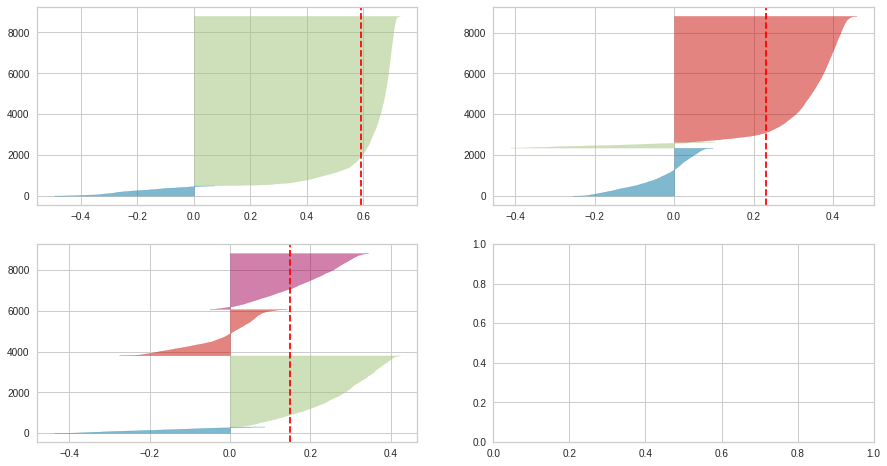

In [34]:
from yellowbrick.cluster import SilhouetteVisualizer
 
fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X)

**<----------------ELBOW ANALYSIS----------------->**

In [35]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    distortions.append(kmeanModel.inertia_)

Text(0.5, 1.0, 'Elbow Method')

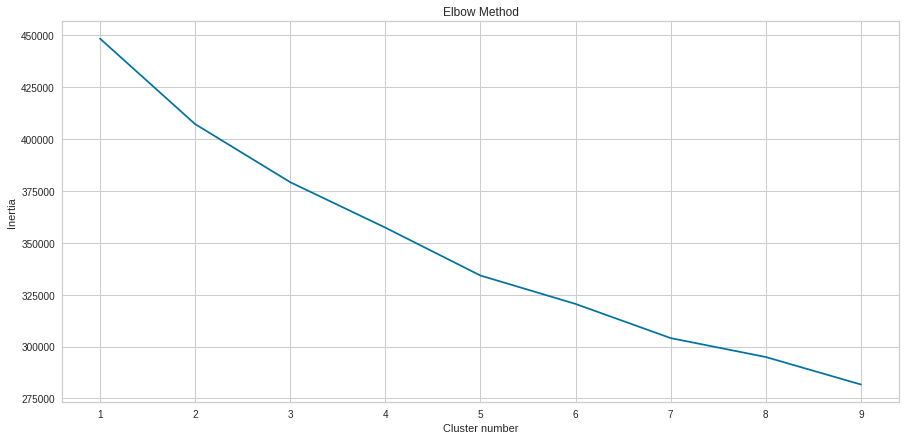

In [36]:
plt.figure(figsize=(15,7))
plt.plot(K, distortions, 'bx-')
plt.xlabel('Cluster number')
plt.ylabel('Inertia')
plt.title('Elbow Method')

***Elbow Analysis shows that there is no optimal option.***

**<-----------------REPEATITION FROM PLOTTING THE LATEST------------------>**

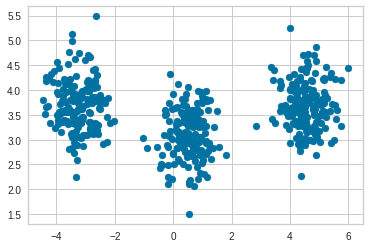

In [83]:
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline
X, y = datasets.make_blobs(n_samples=500, centers=3, cluster_std=0.5, center_box=(-5,5))
plt.scatter(X[:,0], X[:,1])

Text(0.5, 1.0, 'Centers: [-3.27488796  3.70687743] [4.56463485 3.6973162 ] [0.50589268 3.09852096]')

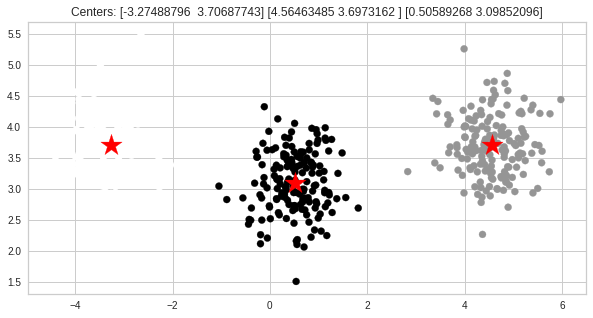

In [84]:
from sklearn import cluster
cl = cluster.KMeans(n_clusters=3)
cl.fit(X)
plt.figure(figsize=(10,5))
plt.scatter(X[:,0], X[:,1], 
            c=cl.predict(X))
plt.scatter(cl.cluster_centers_[:,0],
            cl.cluster_centers_[:,1], s=500, color="red", marker="*")
plt.title("Centers: {} {} {}".format(
        cl.cluster_centers_[0], cl.cluster_centers_[1],cl.cluster_centers_[2]))

In [85]:
from sklearn.metrics import silhouette_score 
   
no_of_clusters = [2, 3, 4]
for n_clusters in no_of_clusters: 
  cluster = KMeans(n_clusters = n_clusters) 
  cluster_labels = cluster.fit_predict(X) 
  silhouette_avg = silhouette_score(X, cluster_labels) 
  print("Cluster number =", n_clusters, 
          " Score :", silhouette_avg)

Cluster number = 2  Score : 0.6515472012008985
Cluster number = 3  Score : 0.7661385912133513
Cluster number = 4  Score : 0.6139256271497445


***Since our average silhouette analysis is 0.76, therefore 3clusters is the optimal value for number of k.***

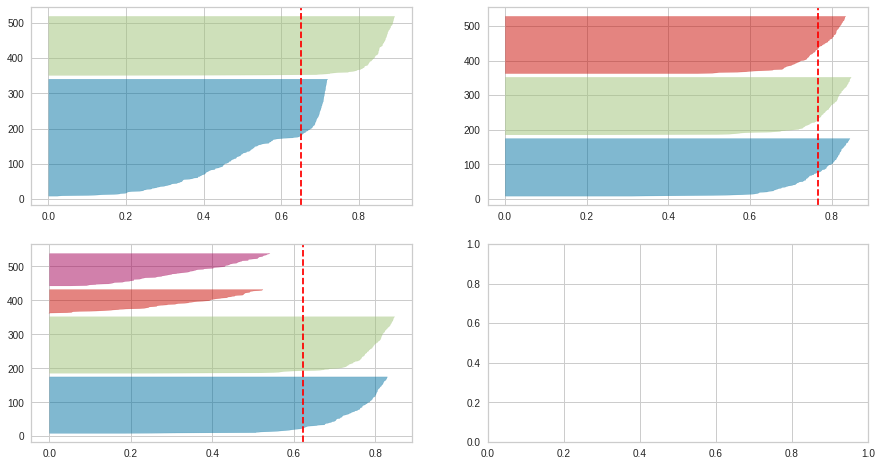

In [86]:
from yellowbrick.cluster import SilhouetteVisualizer
 
fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X)

*This is the visualization of silhoutte score, same score per number of clusters.*

In [87]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    distortions.append(kmeanModel.inertia_)

Text(0.5, 1.0, 'Elbow Method')

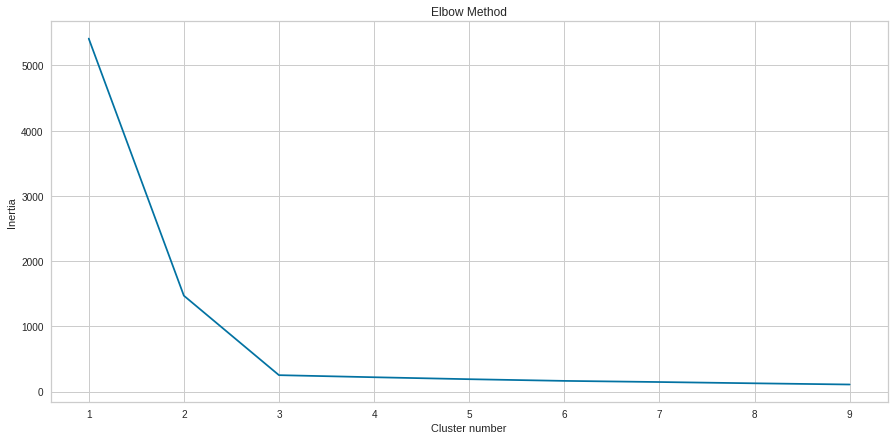

In [88]:
plt.figure(figsize=(15,7))
plt.plot(K, distortions, 'bx-')
plt.xlabel('Cluster number')
plt.ylabel('Inertia')
plt.title('Elbow Method')

***Elbow Analysis shows that 3 is the optimal number of k.***

#**We conclude that since our average silhouette score of k is 3 and our elbow of k is 3 therefore we chose 3 clusters in our model.**

# **Extract CSV**

In [89]:
nutrients.columns

Index(['NDB_No', 'Shrt_Desc', 'Water_(g)', 'Energ_Kcal', 'Protein_(g)',
       'Lipid_Tot_(g)', 'Ash_(g)', 'Carbohydrt_(g)', 'Fiber_TD_(g)',
       'Sugar_Tot_(g)', 'Calcium_(mg)', 'Iron_(mg)', 'Magnesium_(mg)',
       'Phosphorus_(mg)', 'Potassium_(mg)', 'Sodium_(mg)', 'Zinc_(mg)',
       'Copper_mg)', 'Manganese_(mg)', 'Selenium_(µg)', 'Vit_C_(mg)',
       'Thiamin_(mg)', 'Riboflavin_(mg)', 'Niacin_(mg)', 'Panto_Acid_mg)',
       'Vit_B6_(mg)', 'Folate_Tot_(µg)', 'Folic_Acid_(µg)', 'Food_Folate_(µg)',
       'Folate_DFE_(µg)', 'Choline_Tot_ (mg)', 'Vit_B12_(µg)', 'Vit_A_IU',
       'Vit_A_RAE', 'Retinol_(µg)', 'Alpha_Carot_(µg)', 'Beta_Carot_(µg)',
       'Beta_Crypt_(µg)', 'Lycopene_(µg)', 'Lut+Zea_ (µg)', 'Vit_E_(mg)',
       'Vit_D_µg', 'Vit_D_IU', 'Vit_K_(µg)', 'FA_Sat_(g)', 'FA_Mono_(g)',
       'FA_Poly_(g)', 'Cholestrl_(mg)', 'GmWt_1', 'GmWt_Desc1', 'GmWt_2',
       'GmWt_Desc2', 'Refuse_Pct', 'cluster'],
      dtype='object')

In [90]:
clustered_food = nutrients[["NDB_No","cluster"]]
print(clustered_food.head())

   NDB_No  cluster
0    1001        0
1    1002        0
2    1003        0
3    1004        0
4    1005        0


In [91]:
clustered_food.shape

(8790, 2)

In [92]:
clustered_food.to_csv("Not_Final_Clustered_Food.csv",index=False)

In [93]:
final = pd.merge(original, clustered_food)
final.head()

,NDB_No,Shrt_Desc,Water_(g),Energ_Kcal,Protein_(g),Lipid_Tot_(g),Ash_(g),Carbohydrt_(g),Fiber_TD_(g),Sugar_Tot_(g),...,FA_Sat_(g),FA_Mono_(g),FA_Poly_(g),Cholestrl_(mg),GmWt_1,GmWt_Desc1,GmWt_2,GmWt_Desc2,Refuse_Pct,cluster
0,1001,"BUTTER,WITH SALT",15.87,717,0.85,81.11,2.11,0.06,0.0,0.06,...,51.368,21.021,3.043,215.0,5.00,"1 pat, (1"" sq, 1/3"" high)",14.2,1 tbsp,0.0,0
1,1002,"BUTTER,WHIPPED,W/ SALT",16.72,718,0.49,78.30,1.62,2.87,0.0,0.06,...,45.390,19.874,3.331,225.0,3.80,"1 pat, (1"" sq, 1/3"" high)",9.4,1 tbsp,0.0,0
2,1003,"BUTTER OIL,ANHYDROUS",0.24,876,0.28,99.48,0.00,0.00,0.0,0.00,...,61.924,28.732,3.694,256.0,12.80,1 tbsp,205.0,1 cup,0.0,0
3,1004,"CHEESE,BLUE",42.41,353,21.40,28.74,5.11,2.34,0.0,0.50,...,18.669,7.778,0.800,75.0,28.35,1 oz,17.0,1 cubic inch,0.0,0
4,1005,"CHEESE,BRICK",41.11,371,23.24,29.68,3.18,2.79,0.0,0.51,...,18.764,8.598,0.784,94.0,132.00,"1 cup, diced",113.0,"1 cup, shredded",0.0,0


In [94]:
final.shape

(8790, 54)

In [95]:
final.to_csv("Merged.csv",index=False)

In [96]:
cluster_1 = final.loc[final.cluster.isin([0])]
cluster_1.head()

,NDB_No,Shrt_Desc,Water_(g),Energ_Kcal,Protein_(g),Lipid_Tot_(g),Ash_(g),Carbohydrt_(g),Fiber_TD_(g),Sugar_Tot_(g),...,FA_Sat_(g),FA_Mono_(g),FA_Poly_(g),Cholestrl_(mg),GmWt_1,GmWt_Desc1,GmWt_2,GmWt_Desc2,Refuse_Pct,cluster
0,1001,"BUTTER,WITH SALT",15.87,717,0.85,81.11,2.11,0.06,0.0,0.06,...,51.368,21.021,3.043,215.0,5.00,"1 pat, (1"" sq, 1/3"" high)",14.2,1 tbsp,0.0,0
1,1002,"BUTTER,WHIPPED,W/ SALT",16.72,718,0.49,78.30,1.62,2.87,0.0,0.06,...,45.390,19.874,3.331,225.0,3.80,"1 pat, (1"" sq, 1/3"" high)",9.4,1 tbsp,0.0,0
2,1003,"BUTTER OIL,ANHYDROUS",0.24,876,0.28,99.48,0.00,0.00,0.0,0.00,...,61.924,28.732,3.694,256.0,12.80,1 tbsp,205.0,1 cup,0.0,0
3,1004,"CHEESE,BLUE",42.41,353,21.40,28.74,5.11,2.34,0.0,0.50,...,18.669,7.778,0.800,75.0,28.35,1 oz,17.0,1 cubic inch,0.0,0
4,1005,"CHEESE,BRICK",41.11,371,23.24,29.68,3.18,2.79,0.0,0.51,...,18.764,8.598,0.784,94.0,132.00,"1 cup, diced",113.0,"1 cup, shredded",0.0,0


In [97]:
cluster_1.shape

(8620, 54)

In [98]:
cluster_1.to_csv("Cluster 1.csv",index=False)

In [99]:
cluster_2 = final.loc[final.cluster.isin([1])]
cluster_2.head()

,NDB_No,Shrt_Desc,Water_(g),Energ_Kcal,Protein_(g),Lipid_Tot_(g),Ash_(g),Carbohydrt_(g),Fiber_TD_(g),Sugar_Tot_(g),...,FA_Sat_(g),FA_Mono_(g),FA_Poly_(g),Cholestrl_(mg),GmWt_1,GmWt_Desc1,GmWt_2,GmWt_Desc2,Refuse_Pct,cluster
258,2009,CHILI POWDER,10.75,282,13.46,14.28,11.81,49.70,34.8,7.19,...,2.462,3.211,8.006,0.0,2.7,1 tsp,8.0,1 tbsp,0.0,1
272,2023,"MARJORAM,DRIED",7.64,271,12.66,7.04,12.10,60.56,40.3,4.09,...,0.529,0.940,4.405,0.0,0.6,1 tsp,1.7,1 tbsp,0.0,1
280,2031,"PEPPER,RED OR CAYENNE",8.05,318,12.01,17.27,6.04,56.63,27.2,10.34,...,3.260,2.750,8.370,0.0,1.8,1 tsp,5.3,1 tbsp,0.0,1
307,2066,"SPEARMINT,DRIED",11.30,285,19.93,6.03,10.70,52.04,29.8,NaN,...,1.577,0.210,3.257,0.0,0.5,1 tsp,1.6,1 tbsp,0.0,1
310,2073,"PACE,DRY TACO SEAS MIX",5.70,188,0.00,0.00,38.01,56.29,18.8,18.76,...,0.000,NaN,NaN,0.0,5.3,"2 tbsp, (1 serving)",NaN,NaN,0.0,1


In [100]:
cluster_2.shape

(156, 54)

In [101]:
cluster_2.to_csv("Cluster 2.csv", index=False)

In [102]:
cluster_3 = final.loc[final.cluster.isin([2])]
cluster_3.head()

,NDB_No,Shrt_Desc,Water_(g),Energ_Kcal,Protein_(g),Lipid_Tot_(g),Ash_(g),Carbohydrt_(g),Fiber_TD_(g),Sugar_Tot_(g),...,FA_Sat_(g),FA_Mono_(g),FA_Poly_(g),Cholestrl_(mg),GmWt_1,GmWt_Desc1,GmWt_2,GmWt_Desc2,Refuse_Pct,cluster
277,2028,PAPRIKA,11.24,282,14.14,12.89,7.74,53.99,34.9,10.34,...,2.140,1.695,7.766,0.0,2.3,1 tsp,6.8,1 tbsp,0.0,2
724,4589,"FISH OIL,COD LIVER",0.00,902,0.00,100.00,0.00,0.00,0.0,NaN,...,22.608,46.711,22.541,570.0,4.5,1 tsp,13.6,1 tbsp,0.0,2
3273,11615,"CHIVES,FREEZE-DRIED",2.00,311,21.20,3.50,9.01,64.29,26.2,NaN,...,0.591,0.490,1.369,0.0,0.2,1 tbsp,0.8,.25 cup,0.0,2
3282,11625,"PARSLEY,FREEZE-DRIED",2.00,271,31.30,5.20,19.12,42.38,32.7,NaN,...,NaN,NaN,NaN,0.0,0.4,1 tbsp,1.4,.25 cup,0.0,2
3314,11683,"CARROT,DEHYDRATED",4.00,341,8.10,1.49,6.84,79.57,23.6,38.82,...,0.256,0.076,0.730,0.0,74.0,1 cup,NaN,NaN,0.0,2


In [103]:
cluster_3.shape

(14, 54)

In [104]:
cluster_3.to_csv("Cluster 3.csv", index=False)

In [ ]:
pickles = nutrients[["NDB_No","Shrt_Desc","cluster"]]
print(pickles.head())

   NDB_No               Shrt_Desc  cluster
0    1001        BUTTER,WITH SALT        1
1    1002  BUTTER,WHIPPED,W/ SALT        1
2    1003    BUTTER OIL,ANHYDROUS        1
3    1004             CHEESE,BLUE        1
4    1005            CHEESE,BRICK        1


In [ ]:
pickles.to_csv("firebase.csv", index=False)

In [ ]:
import pickle
pickle.dump(final,open('model.pkl','wb'))